## Import de libs

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

2024-01-31 23:50:50.490891: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 23:50:50.813508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 23:50:50.813597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 23:50:50.877971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 23:50:51.009874: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 23:50:51.011582: I tensorflow/core/platform/cpu_feature_guard.cc:1

## Datasets loads

In [2]:
dataset =  keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

## Data explorer

In [3]:
imagens_treino

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
len(imagens_treino)

60000

In [5]:
imagens_treino.shape

(60000, 28, 28)

In [6]:
identificacoes_treino.min()
identificacoes_treino.max()

9

## Data visualization

Text(0.5, 1.0, '9')

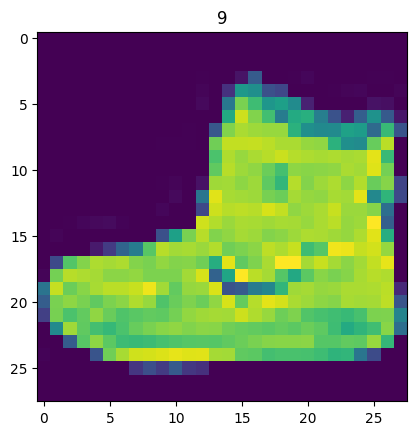

In [7]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [8]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

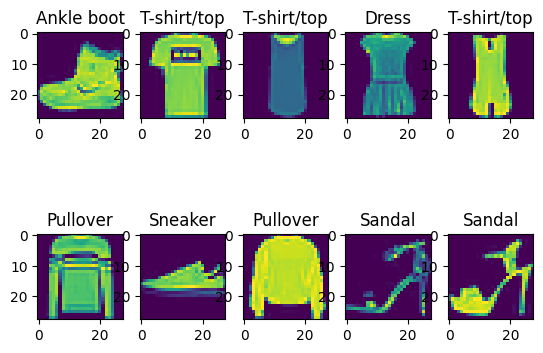

In [9]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])


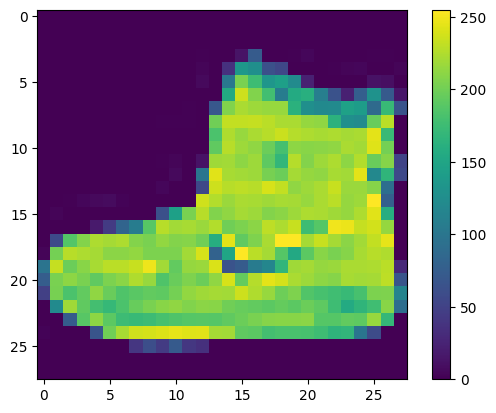

In [10]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Iniciando processo de deep learning

### Normalizando as imagens

In [11]:
imagens_treino = imagens_treino/float(255)

### Criando, compilando, treinando e normalizando o modelo

In [120]:
modelo = keras.Sequential([
    #entrada
    keras.layers.Flatten(input_shape=(28, 28)),
    #processamento
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.15),
    #saida
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])


# definir um callback EarlyStopping, utilizado para parar automaticamente o treinamento qdo o modelo estacionar em um *mínimo local
# ModelCheckpoint para salvar o melhor modelo automaticamente

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), 
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss',
                                             save_best_only=True
                                             )
             ]


#definir otimizador e seus hyperparâmetros
adam = keras.optimizers.Adam(lr=0.0001)

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=32, epochs=50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5218 - accuracy: 0.8151 - val_loss: 0.4307 - val_accuracy: 0.8395
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3906 - accuracy: 0.8583 - val_loss: 0.3804 - val_accuracy: 0.8637
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3547 - accuracy: 0.8701 - val_loss: 0.3476 - val_accuracy: 0.8735
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3345 - accuracy: 0.8763 - val_loss: 0.3596 - val_accuracy: 0.8688


### Sumário do modelo

In [84]:
sumario_do_modelo = modelo.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Pesos da primeira cada Dense

In [85]:
pesos_da_camada_dense = modelo.layers[1].get_weights()[0]
pesos_da_camada_dense

array([[ 0.01565603,  0.02456341,  0.03622316, ...,  0.02379034,
         0.05692877,  0.03160673],
       [-0.05235479, -0.01756551, -0.06323524, ..., -0.07174918,
         0.02476852,  0.02621683],
       [-0.01828205,  0.09455697, -0.09159694, ..., -0.0570455 ,
         0.07564615,  0.09458067],
       ...,
       [ 0.04168932, -0.07831957,  0.01629087, ..., -0.02572301,
         0.09683141, -0.02354561],
       [ 0.08385532,  0.00127629, -0.08494101, ...,  0.03505863,
         0.12338977,  0.04489827],
       [ 0.03616537, -0.00070217,  0.02087411, ...,  0.0733012 ,
         0.05219126, -0.01388178]], dtype=float32)

In [86]:
vieses_da_camada_dense = modelo.layers[1].get_weights()[1]
vieses_da_camada_dense

array([ 0.06329165,  0.03357722, -0.03304895,  0.01862605, -0.04774811,
        0.13764416, -0.14250244, -0.01792079,  0.08706329,  0.03024883,
        0.03080668, -0.0061151 ,  0.01219686,  0.09254998, -0.04091072,
       -0.00473729, -0.1304026 ,  0.11772907,  0.13678253,  0.07063787,
       -0.07653762,  0.01135756,  0.16400193,  0.10107651,  0.09812556,
       -0.0103884 , -0.00702137,  0.1649278 ,  0.03789879, -0.00151599,
        0.173615  ,  0.1249927 ,  0.14782515,  0.16813625, -0.08879232,
        0.06167651, -0.0189614 ,  0.1065879 ,  0.03267013,  0.0519194 ,
        0.07415712, -0.08472308, -0.0342381 ,  0.07505932, -0.0409173 ,
       -0.06661507,  0.039954  , -0.10529766, -0.00041213, -0.04772703,
        0.03140863, -0.03591967, -0.02356873, -0.00992677,  0.07896634,
       -0.01144105,  0.08452608,  0.09189941,  0.07569164,  0.14614223,
        0.10795049,  0.15173253,  0.11898959, -0.11952868,  0.15268514,
        0.15279332, -0.02548851,  0.09141958,  0.01554003, -0.05

### Salvando e carregando o modelo treinado

In [87]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [88]:
historico.history

{'loss': [0.7021856307983398,
  0.46320614218711853,
  0.41370710730552673,
  0.3833391070365906,
  0.3593694269657135,
  0.34275203943252563],
 'accuracy': [0.7604166865348816,
  0.8413541913032532,
  0.856124997138977,
  0.8648750185966492,
  0.8732500076293945,
  0.8784791827201843],
 'val_loss': [0.49639075994491577,
  0.4374282956123352,
  0.3922545909881592,
  0.37594592571258545,
  0.3561056852340698,
  0.35691240429878235],
 'val_accuracy': [0.8231666684150696,
  0.8452500104904175,
  0.8615833520889282,
  0.8695833086967468,
  0.8715833425521851,
  0.8726666569709778]}

### Vizualizando as acurácias de treino e validação por época

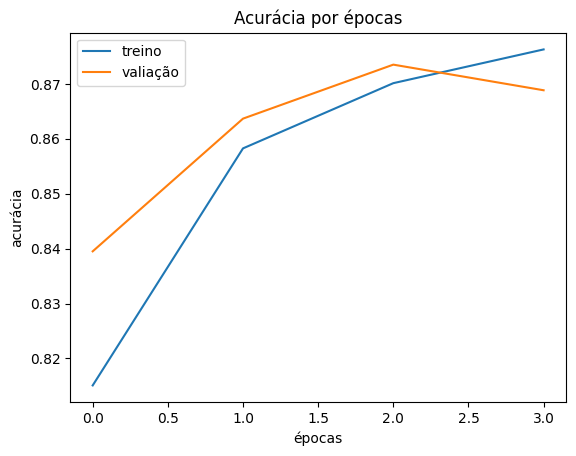

In [121]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'valiação'])

### Vizualizando as perdas de treino e validação por época

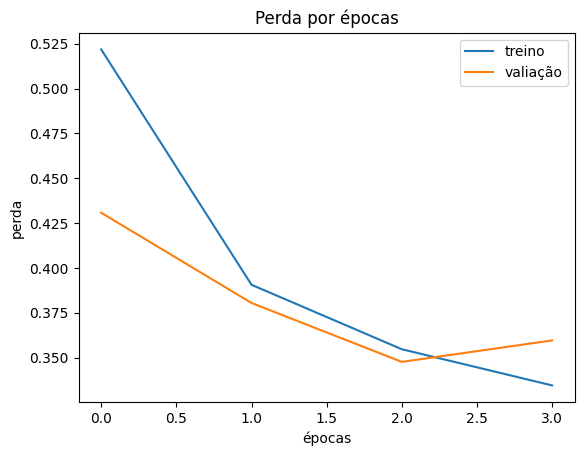

In [122]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'valiação'])

## Testando o modelo e o modelo salvo

In [91]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[3]))
print('número da imagem de teste:', identificacoes_teste[3])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[3]))
print('número da imagem de teste:', identificacoes_teste[3])

 81/313 [======>.......................] - ETA: 0s

313/313 [==============================] - 0s 612us/step
resultado teste: 1
número da imagem de teste: 1
313/313 [==============================] - 0s 535us/step
resultado teste modelo salvo: 1
número da imagem de teste: 1


### Avaliando o modelo

In [92]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 583us/step - loss: 51.1146 - accuracy: 0.8593
Perda do teste: 51.11457061767578
Acurácia do teste: 0.8593000173568726


In [93]:
perda_teste, acuracia_teste = modelo_salvo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 0s 584us/step - loss: 51.1146 - accuracy: 0.8593
Perda do teste: 51.11457061767578
Acurácia do teste: 0.8593000173568726


## Experimentos na Rede Neural

### Teste de modificações de pesos manual

#### Camada de pesos

In [94]:
# para testar vamos zerar os pesos da primeira camada do modelo criado 
# criar um array com os pesos zerados e substituir na camada do modelo
pesos_da_camada_dense.shape
pesos_da_camada_dense_zerados = np.zeros((784, 256))
## defini a primeira camada com pesos zerados e mantem os valores dos vieses
modelo.layers[1].set_weights(
    [pesos_da_camada_dense_zerados, vieses_da_camada_dense]
)
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 0.06329165,  0.03357722, -0.03304895,  0.01862605, -0.04774811,
         0.13764416, -0.14250244, -0.01792079,  0.08706329,  0.03024883,
         0.03080668, -0.0061151 ,  0.01219686,  0.09254998, -0.04091072,
        -0.00473729, -0.1304026 ,  0.11772907,  0.13678253,  0.07063787,
        -0.07653762,  0.01135756,  0.16400193,  0.10107651,  0.09812556,
        -0.0103884 , -0.00702137,  0.1649278 ,  0.03789879, -0.00151599,
         0.173615  ,  0.1249927 ,  0.14782515,  0.16813625, -0.08879232,
         0.06167651, -0.0189614 ,  0.1065879 ,  0.03267013,  0.0519194 ,
         0.07415712, -0.08472308, -0.0342381 ,  0.07505932, -0.0409173 ,
        -0.06661507,  0.039954  , -0.10529766, -0.00041213, -0.04772703,
      

In [95]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=60, epochs=5, validation_split=0.2)

Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 0.5736 - accuracy: 0.7992 - val_loss: 0.4236 - val_accuracy: 0.8514
Epoch 2/5
800/800 [==============================] - 1s 2ms/step - loss: 0.4223 - accuracy: 0.8481 - val_loss: 0.3837 - val_accuracy: 0.8646
Epoch 3/5
800/800 [==============================] - 1s 1ms/step - loss: 0.3794 - accuracy: 0.8622 - val_loss: 0.3636 - val_accuracy: 0.8691
Epoch 4/5
800/800 [==============================] - 1s 1ms/step - loss: 0.3562 - accuracy: 0.8706 - val_loss: 0.3532 - val_accuracy: 0.8725
Epoch 5/5
800/800 [==============================] - 1s 2ms/step - loss: 0.3382 - accuracy: 0.8769 - val_loss: 0.3413 - val_accuracy: 0.8771


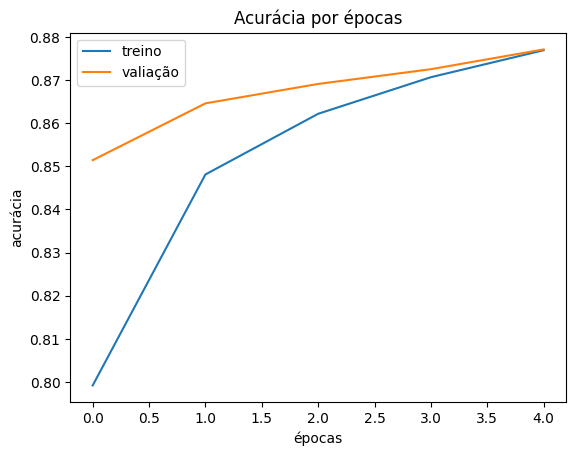

In [96]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'valiação'])

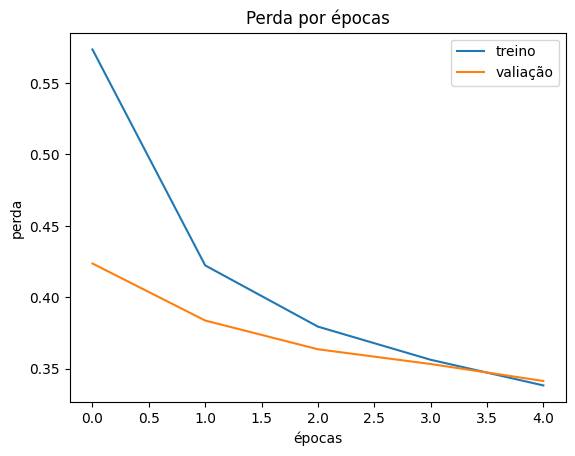

In [97]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'valiação'])

In [98]:
## Check configurações da rede
modelo.get_config()

{'name': 'sequential_15',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_15_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_15',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_30',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'clas

In [99]:
# para testar vamos zerar os pesos da primeira camada do modelo criado 
# criar um array com os pesos aleatorios e substituir na camada do modelo
pesos_da_camada_dense.shape
pesos_da_camada_dense_aleatorios = np.random.rand(784, 256)
## defini a primeira camada com pesos aleatorios e mantem os valores dos vieses
modelo.layers[1].set_weights(
    [pesos_da_camada_dense_aleatorios, vieses_da_camada_dense]
)
modelo.layers[1].get_weights()
pesos_da_camada_dense_aleatorios


array([[0.57911674, 0.17756261, 0.53181928, ..., 0.6768759 , 0.4700806 ,
        0.43104982],
       [0.01719296, 0.86638189, 0.30518687, ..., 0.52580988, 0.43597895,
        0.35038536],
       [0.15165356, 0.66588573, 0.00179271, ..., 0.82503735, 0.76257461,
        0.30385947],
       ...,
       [0.92105996, 0.80971037, 0.00884843, ..., 0.37479048, 0.61594023,
        0.49717458],
       [0.04197145, 0.45817963, 0.54720915, ..., 0.85304943, 0.86423449,
        0.02320016],
       [0.33258147, 0.05592528, 0.50234369, ..., 0.32891239, 0.55804077,
        0.84953686]])

In [100]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=60, epochs=5, validation_split=0.2)

Epoch 1/5


800/800 [==============================] - 2s 2ms/step - loss: 119.8682 - accuracy: 0.3445 - val_loss: 17.5981 - val_accuracy: 0.6723
Epoch 2/5
800/800 [==============================] - 1s 2ms/step - loss: 40.3336 - accuracy: 0.5705 - val_loss: 13.7652 - val_accuracy: 0.7247
Epoch 3/5
800/800 [==============================] - 1s 1ms/step - loss: 23.5918 - accuracy: 0.6488 - val_loss: 8.5607 - val_accuracy: 0.7695
Epoch 4/5
800/800 [==============================] - 1s 2ms/step - loss: 14.7131 - accuracy: 0.6883 - val_loss: 7.0496 - val_accuracy: 0.7759
Epoch 5/5
800/800 [==============================] - 1s 2ms/step - loss: 9.3376 - accuracy: 0.7118 - val_loss: 4.7414 - val_accuracy: 0.7925


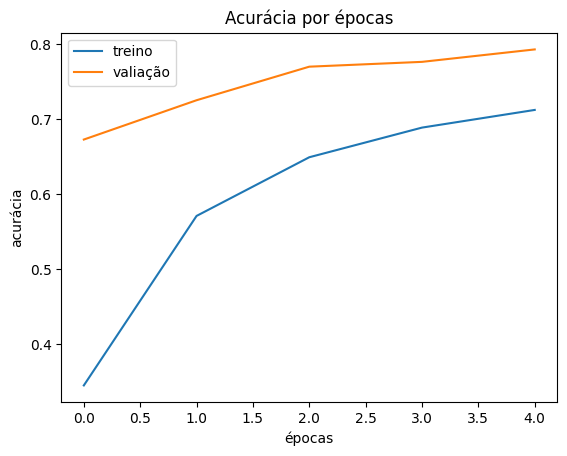

In [101]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'valiação'])

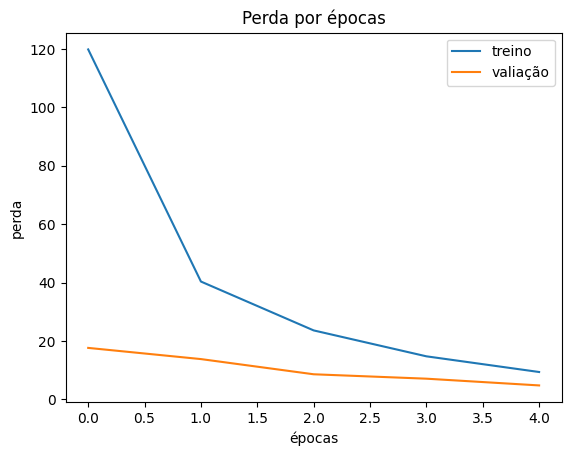

In [102]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'valiação'])

In [103]:
## Check configurações da rede
modelo.get_config()

{'name': 'sequential_15',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_15_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_15',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_30',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'clas

### Camada de vieses

In [104]:
vieses_da_camada_dense = modelo.layers[1].get_weights()[1]
vieses_da_camada_dense.shape

(256,)

In [105]:
# para testar vamos zerar os vieses da primeira camada do modelo criado 
# criar um array com os pesos zerados e substituir na camada do modelo
vieses_da_camada_dense_zerados = np.zeros((256,))
vieses_da_camada_dense_zerados
## defini a primeira camada com vieses zerados 
modelo.layers[1].set_weights(
    [pesos_da_camada_dense_zerados, vieses_da_camada_dense_zerados]
)
modelo.layers[1].get_weights()
vieses_da_camada_dense_zerados

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [106]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size=60, epochs=5, validation_split=0.2)

Epoch 1/5


800/800 [==============================] - 2s 2ms/step - loss: 2.3940 - accuracy: 0.1001 - val_loss: 2.3343 - val_accuracy: 0.0995
Epoch 2/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3152 - accuracy: 0.1001 - val_loss: 2.3059 - val_accuracy: 0.0995
Epoch 3/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3037 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0995
Epoch 4/5
800/800 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 5/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0995


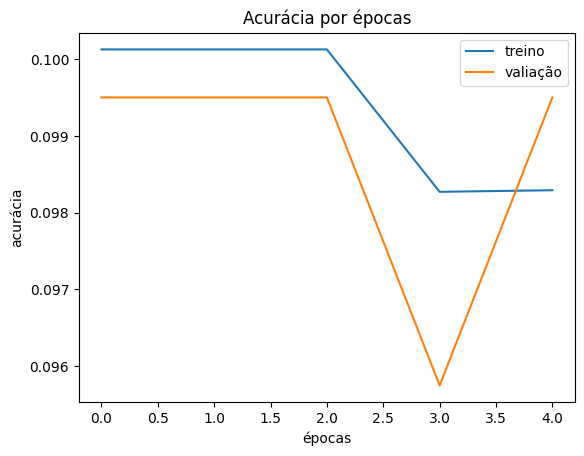

In [107]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'valiação'])

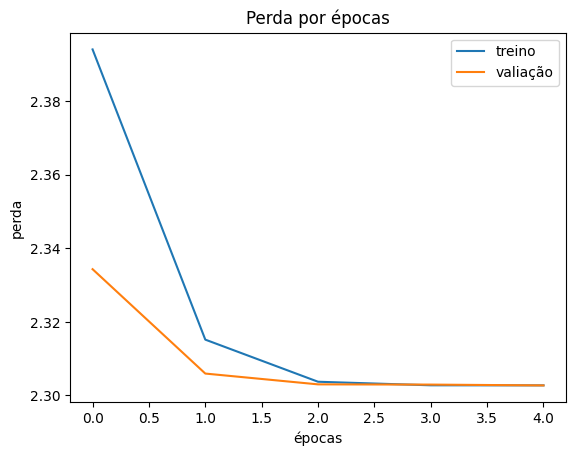

In [108]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'valiação'])

In [109]:
# para testar vamos zerar os vieses da primeira camada do modelo criado 
# criar um array com os pesos aleatorios e substituir na camada do modelo
vieses_da_camada_dense_zerados = np.zeros((256,))
vieses_da_camada_dense_zerados
## defini a primeira camada com vieses zerados 
modelo.layers[1].set_weights(
    [pesos_da_camada_dense_aleatorios, vieses_da_camada_dense_zerados]
)

In [110]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 32.3151 - accuracy: 0.4466 - val_loss: 4.8973 - val_accuracy: 0.6917
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 10.3923 - accuracy: 0.6159 - val_loss: 4.4848 - val_accuracy: 0.7254
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 6.0294 - accuracy: 0.6594 - val_loss: 2.4941 - val_accuracy: 0.7718
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 3.9406 - accuracy: 0.6852 - val_loss: 4.0105 - val_accuracy: 0.6217
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 2.5077 - accuracy: 0.7206 - val_loss: 1.6398 - val_accuracy: 0.7629


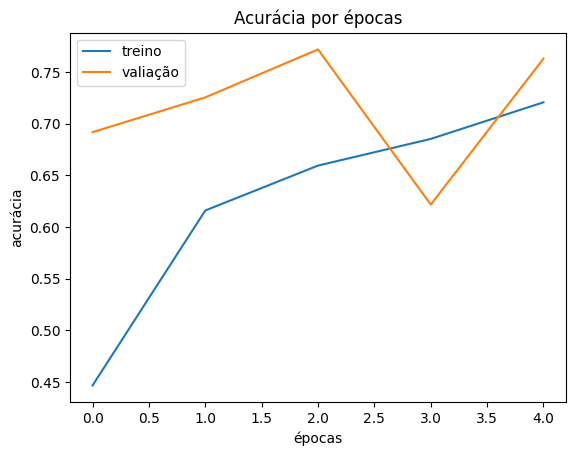

In [111]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'valiação'])

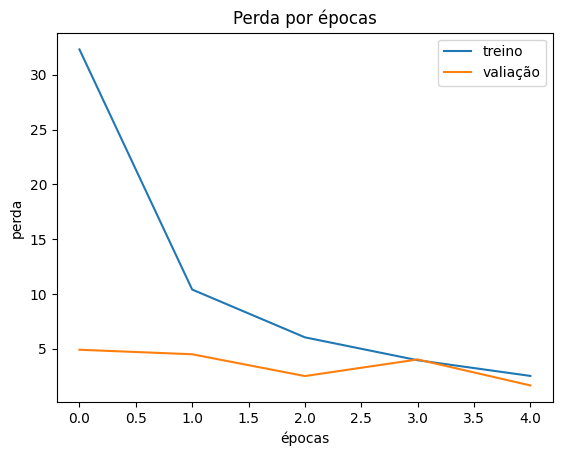

In [112]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'valiação'])